# INSY 669 - Text Analytics - Group Project

## I. Introduction

The idea of our project is to scrape job postings on LinkedIn. The goal is to extract a specific number of words that the program would propose to the user for them to put on their resume in order to increase their chances to be a good fit for the job. This should be done by implementing a mix between the frequency of use of these words, or by seeing if they’re preceded or followed by words that express importance (‘necessary’, ‘important’, ‘mandatory’, etc.).
 
The business idea behind is really the project itself. In the long run, we could implement an app where the user input the link of a specific job posting they desire to apply to, and the app would output important features that should be in their resume.
Students do and will exist quite forever, so we don’t think that there will be a shortage of students any time soon, and the service that this app would provide is quite interesting as much for freshman students as it is for senior ones. At the end of the day, how many students, even in their last year of college/university, are still quite lost in terms of job hunting?

## II. Acquiring the data: Linkedin Scraping

The idea here is to acquire data by scraping LinkedIn. Our data is basically going to be the text located in the job descrption of any job posting. The program we would create out of it would have the aim to provide the most important features that could be found in the job posting such that customers could implement them in their resumes. This program should be able to work for any link that is a job posting coming from LinkedIn.

The key insights we would like to get out of this program are:
* Key role functions
* Required skills (seperate soft skills from technical ones)
* Experience needed

In [39]:
import nltk
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from urllib import request
import matplotlib.pyplot as plt

In [2]:
url= "https://www.linkedin.com/jobs/view/3450553925/?eBP=JYMBII_JOBS_HOME_ORGANIC&refId=65PUvgki5P1iDzlWH9Jz%2FA%3D%3D&trackingId=9xgv6dOX4fdlnLQ7482uNg%3D%3D&trk=flagship3_jobs_discovery_jymbii"
headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"}
page=requests.get(url, headers=headers)

page.status_code

soup=BeautifulSoup(page.text, "html.parser")

data=soup.find_all("li")

data

filtereddata=[]
for i in data:
    striptext=i.text.strip()
    if striptext!="edit":
        filtereddata.append(striptext)

filtereddata

['Jobs',
 'People',
 'Learning',
 '',
 '',
 'Report this company\n                    \n    \n \n\n\n\n\n\n\nReport\n\n\n\n \n\n\n          Report\n\n\n\n\nBack\nSubmit',
 '',
 '',
 '',
 '',
 '',
 'Providing performance improvement advice, based on the full range of advisory services (pre- or post-transaction);',
 'Establishing the operational and commercial viability of a potential target acquisition through a very rapid operational and financial diagnosis;',
 'Managing complex and volatile situations by optimizing corporate profitability and liquidity; and',
 'Improving working capital by optimizing payables, receivables and inventory management processes.',
 'Work directly with the project team on mandates to optimize a company’s profitability',
 'Work with data to identify levers of value creation for our clients',
 'Working closely with business stakeholders and IT departments to identify and extract the data required for the analyses;',
 'Testing the quality of the data received;

## III. Pre-processing

In [3]:
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# Add additional words to the stopwords list
stop_words.update(['like', 'saw', 'mr', 'miss', 'mrs', 
                   'sir', 'say', 'come', 'man', 'know', 'says', 'said', 'would', 'look', 'could'])

def preprocess_text(text):
    # lowercase the text
    text = text.lower()
    
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # remove whitespaces
    text = text.strip()

    # tokenize the text
    tokens = text.split()

    # remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # join the tokens back into a string
    text = ' '.join(tokens)

    return text

In [4]:
preprocessed_values = []

In [5]:
for value in filtereddata:
    preprocessed_values.append(preprocess_text(value))

In [6]:
import nltk
nltk.download('punkt')

preprocessed_values = [nltk.word_tokenize(value) for value in preprocessed_values]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kenzasqalli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
punct=["“", "—“", "—", "’", "” “","”", "——"]

for i in preprocessed_values:
    for j in i:
        if j in punct:
            i.remove(j)

In [8]:
preprocessed_values = [item for sublist in preprocessed_values for item in sublist if item]

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

preprocessed_values = [lemmatizer.lemmatize(word) for word in preprocessed_values]
preprocessed_values = [stemmer.stem(word) for word in preprocessed_values]

In [9]:
preprocessed_values = [word.lower() for word in preprocessed_values]

In [10]:
preprocessed_values

['jobs',
 'people',
 'learning',
 'report',
 'company',
 'report',
 'report',
 'back',
 'submit',
 'providing',
 'performance',
 'improvement',
 'advice',
 'based',
 'full',
 'range',
 'advisory',
 'services',
 'pre',
 'posttransaction',
 'establishing',
 'operational',
 'commercial',
 'viability',
 'potential',
 'target',
 'acquisition',
 'rapid',
 'operational',
 'financial',
 'diagnosis',
 'managing',
 'complex',
 'volatile',
 'situations',
 'optimizing',
 'corporate',
 'profitability',
 'liquidity',
 'improving',
 'working',
 'capital',
 'optimizing',
 'payables',
 'receivables',
 'inventory',
 'management',
 'processes',
 'work',
 'directly',
 'project',
 'team',
 'mandates',
 'optimize',
 'company',
 's',
 'profitability',
 'work',
 'data',
 'identify',
 'levers',
 'value',
 'creation',
 'clients',
 'working',
 'closely',
 'business',
 'stakeholders',
 'departments',
 'identify',
 'extract',
 'data',
 'required',
 'analyses',
 'testing',
 'quality',
 'data',
 'received',
 'formul

Remove non-english words

In [11]:
from nltk.corpus import words

nltk.download("words")

def is_english_word(word):
    """Check if a word is an English word"""
    english_words = set(words.words())
    return word in english_words

def remove_non_english_words(word_list):
    """Remove words from a list that are not English words"""
    return [word for word in word_list if is_english_word(word)]

p=remove_non_english_words(preprocessed_values)

[nltk_data] Downloading package words to
[nltk_data]     /Users/kenzasqalli/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [12]:
preprocessed_values=p

## IV. Gain insights

* Key role functions

What are the primary activities involved in this role that a candidate must have experience in performing?

In [13]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character used by wordnetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1]
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag[0], wordnet.NOUN)

def identify_verbs(word_list):
    lemmatizer = nltk.WordNetLemmatizer()
    verbs = []
    for word in word_list:
        pos = get_wordnet_pos(word)
        if pos == wordnet.VERB:
            verbs.append(lemmatizer.lemmatize(word, pos))
    return verbs

def identify_nouns(word_list):
    lemmatizer = nltk.WordNetLemmatizer()
    nouns = []
    for word in word_list:
        pos = get_wordnet_pos(word)
        if pos == wordnet.NOUN:
            nouns.append(lemmatizer.lemmatize(word, pos))
    return nouns 

In [14]:
verbs1=identify_verbs(preprocessed_values)

genericverbs=["work","take","have","come","will","do"]

verbs=[verb for verb in verbs1 if verb not in genericverbs]

In [15]:
verbcount={}
for verb in verbs:
    if verb in verbcount:
        verbcount[verb]+=1
    else:
        verbcount[verb]=1

verb,count=zip(*verbcount.items())        
        
verbdf=pd.DataFrame(zip(verb,count), columns=["Verbs", "Verb Count"]).sort_values(by="Verb Count", ascending=False)
verbdf=verbdf.iloc[0:5,:].reset_index()
verbdf=verbdf[["Verbs","Verb Count"]]

In [16]:
vdict=verbdf.set_index("Verbs")["Verb Count"].to_dict()

In [17]:
nouns1=identify_nouns(preprocessed_values)

genericnouns=["job","work","company", "position", "role", "montreal", "quebec", "canada","home","business","requirements",
             "day", "week","month","year", "analyst", "de","person", "people"]

nouns=[noun for noun in nouns1 if noun not in genericnouns]

In [18]:
nouncount={}
for noun in nouns:
    if noun in nouncount:
        nouncount[noun]+=1
    else:
        nouncount[noun]=1

noun,count=zip(*nouncount.items())        
        
noundf=pd.DataFrame(zip(noun,count), columns=["Nouns", "Noun Count"]).sort_values(by="Noun Count", ascending=False)
noundf=noundf.iloc[0:5,:].reset_index()
noundf=noundf[["Nouns","Noun Count"]]

In [19]:
ndict=noundf.set_index("Nouns")["Noun Count"].to_dict()

In [35]:
functions=pd.merge(verbdf,noundf, left_index=True, right_index=True)
functions

,Verbs,Verb Count,Nouns,Noun Count
0,identify,3,data,27
1,provide,2,intelligence,15
2,help,2,performance,8
3,carry,2,experience,7
4,simplify,2,analysis,7


In [37]:
!pip install WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.8 MB/s eta 0:00:00a 0:00:01


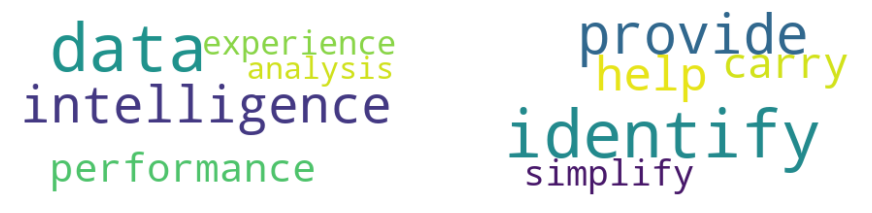

In [40]:
from wordcloud import WordCloud

wordcloud1 = WordCloud(background_color="white").generate_from_frequencies(ndict)
wordcloud2 = WordCloud(background_color="white").generate_from_frequencies(vdict)

# Plot the word clouds
fig, axs = plt.subplots(1, 2, figsize=(11,8))
axs[0].imshow(wordcloud1, interpolation="bilinear")
axs[0].axis("off")
axs[1].imshow(wordcloud2, interpolation="bilinear")
axs[1].axis("off")
plt.show()

* Required skills (Soft skills & Technical skills)

##### Soft skills
Define a list of softkills

In [20]:
softskills = ['Honesty', 'Kindness','Focusing','Polite', 'Patience', 
              'Respectfulness','Humor', 'empathic','Self-Control', 
              'Sociability','Consideration', 'Open', 'Speaking',
              'Writing', 'Communication', 'Presentation', 'Listening',
              'unbiased', 'Feedback', 'flexible', 'Teach',
              'Improvisation','Calmness', 'cooperative', 'Helpfulness',
              'Supportive', 'Influence', 'Persuasiveness', 'Discipline',
              'Perseverance','efficient', 'Motivation', 'Punctuality', 
              'Happiness', 'Confidence', 'Optimist', 'Enthusiasm', 
              'Encouraging','Sophistication', 'Leadership', 'Mentoring']

The following is a program that will generate synonyme words given a root. The goal is to group words of the same meaning, in order to analyse the frequency, and thus the importance, of a soft skill in a given job posting.

In [21]:
from nltk.corpus import wordnet

In [22]:
# Function to generate all possible words given the root
def generate_words(root):
    # Get the synonyms for the root
    synonyms = wordnet.synsets(root)
    # Initialize an empty list to store the words
    words = []
    # Loop through the synonyms
    for syn in synonyms:
        # Get the lemma names for each synonym
        for lemma in syn.lemmas():
            # Add the lemma name to the list of words
            words.append(lemma.name())
    # Return the unique words
    return set(words)

In [23]:
# Dictionary to store the soft skills and their corresponding words
SS = {}

In [24]:
# Loop through the soft skills
for skill in softskills:
    # Get the root of the skill
    root = nltk.stem.WordNetLemmatizer().lemmatize(skill.lower(), pos='n')
    # Get the words generated by the generate_words function
    words = generate_words(root)
    # Add the root and the generated words to the dictionary
    SS[skill] = words

Perform frequency analysis on the words in the list preprocessed_values and to see if they match the values in the dictionary SS.

In [25]:
def count_soft_skills(preprocessed_values, SS):
    frequency = {key: 0 for key in SS.keys()}
    for word in preprocessed_values:
        for key in SS:
            if word in SS[key]:
                frequency[key] += 1
    return frequency


frequency_SS = count_soft_skills(preprocessed_values, SS)

In [26]:
# Print important softskills for the speicifc job posting:
sorted_frequency_SS = dict(sorted(frequency_SS.items(), key=lambda item: item[1], reverse=True))
for key, value in sorted_frequency_SS.items():
    if value > 0:
        print(f'{key}: {value}')

Influence: 4
Communication: 1
Teach: 1
Discipline: 1


The insight we can gain from this code is that the most important softskill to have here are good leadership skills. It is then followed by having great discipline, being open to learning new things, and having great communication skills.

##### Hard skills
Define a list of Hard Skills

In [27]:
hardskills = ['computer', 'web', 'data', 'project', 'management', 'network',
             'cloud', 'programming', 'artificial', 'machine', 'database',
             'software', 'engineering', 'cybersecurity', 'visualization',
             'mobile', 'app', 'development', 'digital', 'marketing', 'graphic',
             'design', 'ui', 'ux', 'finance', 'business', 'statistic', 'IT',
             'DevOps', 'Microsoft', 'power', 'bi', 'ERP', 'R', 'RStudio', 'Python',
             'SQL', 'Nympy', 'Pandas', 'Gurobi', 'MS', 'Excel', 'PowerPoint', 'Access',
             'Visio', 'Azure', 'Workspace', 'Bricks', 'Alteryx', 'Agile', 'Sigma']

In [28]:
# Dictionary to store the hard skills and their corresponding words
HS = {}

In [29]:
# Loop through the hard skills
for skill in hardskills:
    # Get the root of the skill
    root = nltk.stem.WordNetLemmatizer().lemmatize(skill.lower(), pos='n')
    # Get the words generated by the generate_words function
    words = generate_words(root)
    # Add the root and the generated words to the dictionary
    HS[skill] = words

Perform frequency analysis on the words in the list preprocessed_values and to see if they match the values in the dictionary SS.

In [30]:
def count_hard_skills(preprocessed_values, HS):
    frequency = {key: 0 for key in HS.keys()}
    for word in preprocessed_values:
        for key in HS:
            if word in HS[key]:
                frequency[key] += 1
    return frequency


frequency_HS = count_hard_skills(preprocessed_values, HS)

In [31]:
# Print important hardskills for the speicifc job posting:
sorted_frequency_HS = dict(sorted(frequency_HS.items(), key=lambda item: item[1], reverse=True))
for key, value in sorted_frequency_HS.items():
    if value > 0:
        print(f'{key}: {value}')

business: 65
data: 27
management: 4
finance: 3
power: 3
project: 2
design: 2
Excel: 2
computer: 1
web: 1
network: 1
engineering: 1
development: 1
digital: 1
marketing: 1
Python: 1
Agile: 1
Sigma: 1


It looks like this job posting is about data science in a heavy business environement where it is required to have digital marketing skills, web analytics skills, data engineering skills, Microsoft Excel skills, being comportable using Python, Agile and Sigma, and having finance knowledge.

* Experience needed

In [41]:
#New preprossessing for extracting experience
filtereddata

['Jobs',
 'People',
 'Learning',
 '',
 '',
 'Report this company\n                    \n    \n \n\n\n\n\n\n\nReport\n\n\n\n \n\n\n          Report\n\n\n\n\nBack\nSubmit',
 '',
 '',
 '',
 '',
 '',
 'Providing performance improvement advice, based on the full range of advisory services (pre- or post-transaction);',
 'Establishing the operational and commercial viability of a potential target acquisition through a very rapid operational and financial diagnosis;',
 'Managing complex and volatile situations by optimizing corporate profitability and liquidity; and',
 'Improving working capital by optimizing payables, receivables and inventory management processes.',
 'Work directly with the project team on mandates to optimize a company’s profitability',
 'Work with data to identify levers of value creation for our clients',
 'Working closely with business stakeholders and IT departments to identify and extract the data required for the analyses;',
 'Testing the quality of the data received;

In [42]:
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# Add additional words to the stopwords list
stop_words.update(['like', 'saw', 'mr', 'miss', 'mrs', 
                   'sir', 'say', 'come', 'man', 'know', 'says', 'said', 'would', 'look', 'could'])

def preprocess_text(text):
    # lowercase the text
    text = text.lower()
    
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # remove whitespaces
    text = text.strip()

    # tokenize the text
    tokens = text.split()

    # remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # join the tokens back into a string
    text = ' '.join(tokens)

    return text

In [43]:
preprocessed_val= []
for value in filtereddata:
    preprocessed_val.append(preprocess_text(value))

In [44]:
preprocessed_val = [word.lower() for word in preprocessed_val]

In [45]:
preprocessed_val

['jobs',
 'people',
 'learning',
 '',
 '',
 'report company report report back submit',
 '',
 '',
 '',
 '',
 '',
 'providing performance improvement advice based full range advisory services pre posttransaction',
 'establishing operational commercial viability potential target acquisition rapid operational financial diagnosis',
 'managing complex volatile situations optimizing corporate profitability liquidity',
 'improving working capital optimizing payables receivables inventory management processes',
 'work directly project team mandates optimize company’s profitability',
 'work data identify levers value creation clients',
 'working closely business stakeholders departments identify extract data required analyses',
 'testing quality data received',
 'formulating analysis plan benefit quantification methods',
 'helping manage projects managing data analysts identify levers value creation',
 'carrying analyses using business intelligence tools alteryx power bi',
 'ensuring quality an

In [46]:
required_experience=[]
for post in preprocessed_val :
    if 'experience' in post:
        required_experience.append(post)

# Print out the required experience
print(required_experience)

['3 5 years experience along bachelor degree business intelligence finance business administration computer science related field', 'knowledge experience datadriven work', 'experience creating complex metrics bi tools excel power suite', 'knowledge experience businessoriented work', 'experience working industry 5 years', 'experience working consultancy 3 years', 'experience alteryx andor sql']


In [47]:
import pprint

required_experience=[]
for post in preprocessed_val :
    if 'experience' in post:
        required_experience.append(post)

# Use pprint to print out the required experience
pprint.pprint(required_experience, indent=4, width=80)

[   '3 5 years experience along bachelor degree business intelligence finance '
    'business administration computer science related field',
    'knowledge experience datadriven work',
    'experience creating complex metrics bi tools excel power suite',
    'knowledge experience businessoriented work',
    'experience working industry 5 years',
    'experience working consultancy 3 years',
    'experience alteryx andor sql']


Insights:
In order to be qualified for this job posting, the ideal candidate needs to have 3 to 5 years of experience in the industry, experience in datadriven work, experience with power bi , excel and power suite, 3 years of consultancy experienc and experience with alteryx or SQL

# Conclusion

In conclusion, the process of scraping LinkedIn job postings can provide valuable insights into the most important terms to include in a candidate's resume. Based on the insights gained from this particular job posting, it is clear that experience in data-driven work, knowledge of tools such as Power BI, Excel, and Power Suite, as well as consultancy and SQL or Alteryx experience are essential qualifications. Furthermore, good leadership skills are identified as the most important soft skill, followed by discipline, openness to learning, and communication skills.

This job posting also highlights the importance of having a diverse set of skills in data science, including digital marketing, web analytics, data engineering, Microsoft Excel, Python, Agile, Sigma, and finance knowledge. The use of verbs such as "identify," "provide," "help," "carry," and "simplify" in the job posting further emphasizes the need for a candidate who can deliver data intelligence and improve performance through effective data analysis.

Overall, this job posting serves as a valuable example of the skills and qualifications needed for a data science role in a business environment. By leveraging the insights gained through scraping job postings, job seekers can tailor their resumes to highlight the most relevant skills and experiences for the job they are applying for.